# Sect 15: Hypothesis Testing with Neuro Data 

- ANOVA & AB Testing

- 08/13/20

- online-ds-ft-070620

## Learning Objectives

- Discuss A/B Testing/Experimental Design using my neuroscience research data.
- Discuss the multiple comparison problem.
- Discuss ANOVA
- 

## NOTES

- This notebook is intended to walk through preparing my binge drinking data for Hypothesis Testing
- Specifically, in this notebook I will attempt to use the most appropriate stat tests, which are not taught in the Learn curriculum


- **Repeated Measures ANOVA in Python**
-  **Two way RM ANOVA**

# REFERENCES


- Hypothesis Testing Workflow:
    - https://github.com/jirvingphd/hypothesis_testing_workflow_python

- **Two-Way and RM ANOVA Resources**
    - [RM ANOVA IN Python with Statsmodels](https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/)
    - One-way RM ANOVA (other packages): https://www.marsja.se/repeated-measures-anova-using-python/
    - Two-Way: https://marsja.se/two-way-anova-repeated-measures-using-python/


## HYPOTHESIS TESTING STEPS

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

## Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Real-World Science / Experimental Design

> ## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.
- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">



#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

## Hypothesis Testing: Mouse Data

### Hypothesis
> Question: does stimulation of CRF Neurons in the central amygdala increase alcohol consumption?

- Metric:
- Groups:


- $H_1$: 

- $H_0$: 

$\alpha$=0.05


### Step 1: which type of test?

- What type of data?
    -  Numerical (# of licks)
- How many groups?
    -  Control vs Experimental
    - Training Phases (BL,S,PS,R)

#### Let's First Try to Treat this as 2-sample T-Tests (one for each phase)

In [ ]:
# !pip install -U fsds
from fsds.imports import *

plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)

# Obtaining/Preprocessing Data

In [2]:
import os
print(os.getcwd())

df = pd.read_csv('../../../datasets/mouse_drinking_data_cleaned.csv',#"../../datasets/mouse_drinking_data_cleaned.csv")#,
                 index_col=0)
df.drop('Sex',inplace=True,axis=1)
df 

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_070620_FT_cohort_notes/Mod_2/sect_15/instructor notebooks


,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578


#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [3]:
## Loop through the differnet phases of the experiment
phases = ['BL','S','PS','R1','R2']

## save corresponding column names as values 
col_dict = {}
for phase in phases:
    col_dict[phase] = [col for col in df.columns if col.startswith(phase) ]
col_dict    

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R1': ['R1_1', 'R1_2', 'R1_3', 'R1_4'],
 'R2': ['R2_1', 'R2_2', 'R2_3', 'R2_4']}

In [4]:
## Get then opposite of col_dict
phase_dict = {}
for phase,colnames in col_dict.items():
    for col in colnames:
        phase_dict[col] = phase
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1_1': 'R1',
 'R1_2': 'R1',
 'R1_3': 'R1',
 'R1_4': 'R1',
 'R2_1': 'R2',
 'R2_2': 'R2',
 'R2_3': 'R2',
 'R2_4': 'R2'}

### Calculating individual mouse means by phase

In [5]:
cols = col_dict['BL']
df[cols].mean(axis=1)

Mouse_ID
1     697.00
2     781.00
3     658.25
4     863.50
5     576.25
6     639.25
7     795.75
8     559.50
9     706.25
10    806.50
11    645.25
12    549.00
13    602.00
14    732.50
15    618.00
16    477.25
17    316.00
18    807.50
19    540.25
20    282.75
21    408.25
22    211.00
dtype: float64

In [6]:
df_means = df.reset_index()[['Mouse_ID','Group']].copy()
df_means

,Mouse_ID,Group
0,1,Control
1,2,Control
2,3,Control
3,4,Control
4,5,Experimental
5,6,Experimental
6,7,Experimental
7,8,Experimental
8,9,Experimental
9,10,Experimental


In [10]:
## Calculated the means by phase
df_means = df.reset_index(drop=False)[['Mouse_ID','Group']].copy()

for phase, cols in col_dict.items():
    df_means[phase] = df[cols].mean(axis=1)
df_means.set_index('Mouse_ID',inplace=True)
df_means

,Group,BL,S,PS,R1,R2
Mouse_ID,,,,,,
1,Control,NaN,NaN,NaN,NaN,NaN
2,Control,697.00,703.50,645.25,289.50,578.75
3,Control,781.00,808.75,655.75,356.75,803.25
4,Control,658.25,788.00,864.50,443.75,686.00
5,Experimental,863.50,671.50,704.25,402.25,663.25
6,Experimental,576.25,605.50,603.00,619.75,715.75
7,Experimental,639.25,513.25,618.50,808.75,817.50
8,Experimental,795.75,815.25,645.75,588.00,867.00
9,Experimental,559.50,524.00,525.25,106.00,190.00


Control              AxesSubplot(0.1,0.15;0.363636x0.75)
Experimental    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

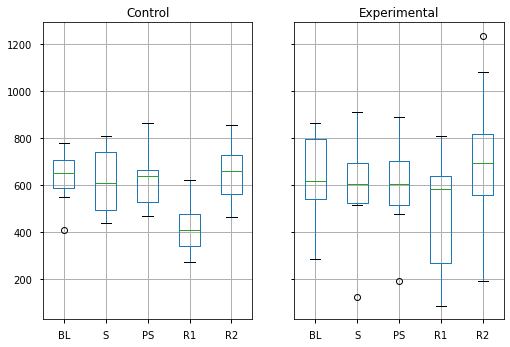

In [11]:
df_means.groupby('Group').boxplot()

### Getting Group Data For EDA & Testing

In [12]:
## Get grps 
data = {}

## Two different ways of using groupby
grps = df_means.groupby('Group').groups

## For each group
for grp in grps:
    
    ## Save the group df as grp name 
    data[grp] = df_means.groupby('Group').get_group(grp)
    
    # Display data
    display(data[grp].head().style.set_caption(grp))

,Group,BL,S,PS,R1,R2
Mouse_ID,,,,,,
1,Control,nan,nan,nan,nan,nan
2,Control,697.000,703.500,645.250,289.500,578.750
3,Control,781.000,808.750,655.750,356.750,803.250
4,Control,658.250,788.000,864.500,443.750,686.000
12,Control,645.250,723.750,686.250,623.000,702.250


,Group,BL,S,PS,R1,R2
Mouse_ID,,,,,,
5,Experimental,863.500,671.500,704.250,402.250,663.250
6,Experimental,576.250,605.500,603.000,619.750,715.750
7,Experimental,639.250,513.250,618.500,808.750,817.500
8,Experimental,795.750,815.250,645.750,588.000,867.000
9,Experimental,559.500,524.000,525.250,106.000,190.000


In [13]:
data.keys()

dict_keys(['Control', 'Experimental'])

In [14]:
data['Control']

,Group,BL,S,PS,R1,R2
Mouse_ID,,,,,,
1,Control,NaN,NaN,NaN,NaN,NaN
2,Control,697.00,703.50,645.25,289.50,578.75
3,Control,781.00,808.75,655.75,356.75,803.25
4,Control,658.25,788.00,864.50,443.75,686.00
12,Control,645.25,723.75,686.25,623.00,702.25
13,Control,549.00,437.25,469.25,273.00,518.75
14,Control,602.00,444.00,529.75,372.00,465.75
15,Control,732.50,518.25,629.25,467.50,636.50
22,Control,408.25,510.25,524.25,504.75,855.25


### Plotting Group Means + Standard Error of the Mean

In [15]:
from scipy.stats import sem

## Create lists for saving x,y, and yerr
x = []
y = []
y_err = []

## Select a phase to visualize
phase = "BL"

# For each group
for group in data:
    
    ## grab the correct phasen col from group data
    grp_data = data[group][phase]
    
    ## Save x,y 
    x.append(group)
    y.append(grp_data.mean())
    
    ## Calc and save error
    y_err.append(sem(grp_data))
    

In [16]:
y_err

[nan, 51.01579900410866]

<BarContainer object of 2 artists>

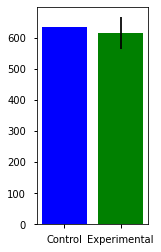

In [17]:
fig,ax = plt.subplots(figsize=(2,4))
plt.bar(x,y,yerr=y_err,color=['b','g'])


In [18]:
def plot_bars_yerr(data,phase = "BL"):
    """Plots the group means +/- standard error of the mean."""
    from scipy.stats import sem

    ## Save x,y, and yerr
    x = []
    y = []
    y_err = []
    
    for group in data:
        grp_data = data[group][phase]
        x.append(f"{group}")
        y.append(grp_data.mean())
        y_err.append(sem(grp_data))
        
    fig,ax = plt.subplots(figsize=(3,5))
    ax.bar(x,y,yerr=y_err,color=['k','b'])
    ax.set_title(f"Phase = {phase}")
    ax.set(ylabel='# of Licks')
    
    return fig,ax

### Run 2-sample T-Test on Baseline Days

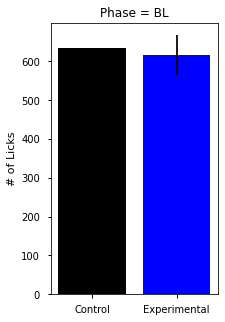

In [19]:
f,a = plot_bars_yerr(data,phase = "BL")

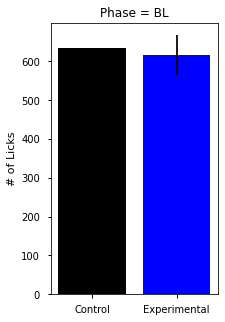

In [20]:
test_phase = "BL"
f,a = plot_bars_yerr(data,phase)

In [21]:
for grp in data:
    pass

for grp,grp_df in data.items():
    print(grp)
#     display(grp_df)
grp_df

Control
Experimental


,Group,BL,S,PS,R1,R2
Mouse_ID,,,,,,
5,Experimental,863.50,671.50,704.25,402.25,663.25
6,Experimental,576.25,605.50,603.00,619.75,715.75
7,Experimental,639.25,513.25,618.50,808.75,817.50
8,Experimental,795.75,815.25,645.75,588.00,867.00
9,Experimental,559.50,524.00,525.25,106.00,190.00
10,Experimental,706.25,695.50,547.75,268.75,510.25
11,Experimental,806.50,913.75,890.00,640.75,694.00
16,Experimental,618.00,587.25,477.75,257.25,559.75
17,Experimental,477.25,587.25,788.75,647.25,1082.75


In [22]:
import scipy.stats as st
test_phase = 'BL'
## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])
results

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



[['Group', 'n', 'Normaltest Stat', 'p', 'sig?'],
 ['Control', 9, nan, nan, False],
 ['Experimental', 13, 0.7406609338476349, 0.6905061035007707, False]]

In [23]:
pd.DataFrame(results[1:],columns=results[0])

,Group,n,Normaltest Stat,p,sig?
0,Control,9,NaN,NaN,False
1,Experimental,13,0.741,0.691,False


### Adding Levene's Test

In [24]:
import scipy.stats as st

## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])


## Test for equal variance
stat, p = st.levene(*test_equal_var)
results.append(['Equal Variance','all',stat,p,p<.05])
    
results_df = pd.DataFrame(results[1:],columns=results[0])
results_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Group,n,Normaltest Stat,p,sig?
0,Control,9,NaN,NaN,False
1,Experimental,13,0.741,0.691,False
2,Equal Variance,all,NaN,NaN,False


### Run Correct Test

In [25]:
st.mannwhitneyu(*test_equal_var)

MannwhitneyuResult(statistic=50.0, pvalue=0.29659312730085824)

In [26]:
## Functionize code for testing other phases
import scipy.stats as st
def test_assumptions(data,test_phase):#,plot=True):

    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

In [27]:
res_df=  test_assumptions(data,'S')
res_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,S,Control,9,NaN,NaN,False
1,S,Experimental,13,8.111,0.017,True
2,S,Equal Variance,all,NaN,NaN,False


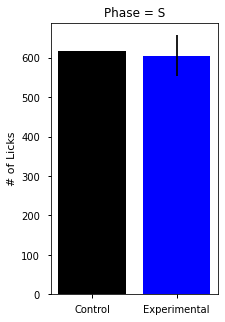

In [28]:
fig,ax = plot_bars_yerr(data,phase='S')

In [29]:
## Add Plotting to function
import scipy.stats as st
def test_assumptions(data,test_phase,plot=True):

    if plot:
        fig,ax = plot_bars_yerr(data,phase=test_phase)
        
    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,BL,Control,9,NaN,NaN,False
1,BL,Experimental,13,0.741,0.691,False
2,BL,Equal Variance,all,NaN,NaN,False


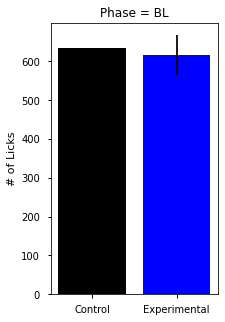

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,S,Control,9,NaN,NaN,False
1,S,Experimental,13,8.111,0.017,True
2,S,Equal Variance,all,NaN,NaN,False


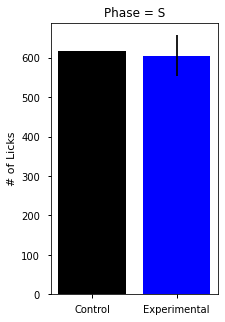

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,PS,Control,9,NaN,NaN,False
1,PS,Experimental,13,2.936,0.23,False
2,PS,Equal Variance,all,NaN,NaN,False


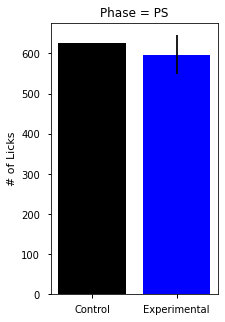

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,R1,Control,9,NaN,NaN,False
1,R1,Experimental,13,1.559,0.459,False
2,R1,Equal Variance,all,NaN,NaN,False


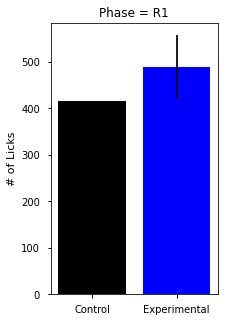

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,R2,Control,9,NaN,NaN,False
1,R2,Experimental,13,0.216,0.898,False
2,R2,Equal Variance,all,NaN,NaN,False


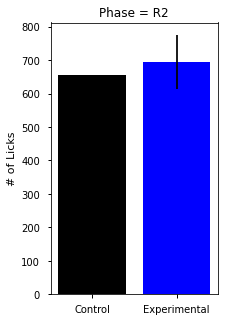

In [30]:
RESULTS = {}
for phase in phases:
    res_df = test_assumptions(data,phase)
    
    display(res_df)
    plt.show()
    

In [31]:
df_means

,Group,BL,S,PS,R1,R2
Mouse_ID,,,,,,
1,Control,NaN,NaN,NaN,NaN,NaN
2,Control,697.00,703.50,645.25,289.50,578.75
3,Control,781.00,808.75,655.75,356.75,803.25
4,Control,658.25,788.00,864.50,443.75,686.00
5,Experimental,863.50,671.50,704.25,402.25,663.25
6,Experimental,576.25,605.50,603.00,619.75,715.75
7,Experimental,639.25,513.25,618.50,808.75,817.50
8,Experimental,795.75,815.25,645.75,588.00,867.00
9,Experimental,559.50,524.00,525.25,106.00,190.00


## RM ANOVA Melting DF

In [32]:
df

,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578


In [34]:
## MELTING THE DATA INTO FORM WORKABLE FOR PLOTS/ANALYSIS
df2= pd.melt(df.reset_index(drop=False),id_vars=['Mouse_ID','Group'],
              value_name='Licks',var_name='Day')

## Mapping Phase from Phase Dict
df2['Phase'] = df2['Day'].map(phase_dict)

## Getting Day of Phase
df2['Day_of_Phase'] = df2['Day'].apply(lambda x: x[-1])
# df2 = df2.dropna(subset=['Phase'])
df2

,Mouse_ID,Group,Day,Licks,Phase,Day_of_Phase
0,1,Control,BL1,665,BL,1
1,2,Control,BL1,859,BL,1
2,3,Control,BL1,589,BL,1
3,4,Control,BL1,939,BL,1
4,5,Experimental,BL1,710,BL,1
...,...,...,...,...,...,...
435,18,Experimental,R2_4,880,R2,4
436,19,Experimental,R2_4,1047,R2,4
437,20,Experimental,R2_4,293,R2,4
438,21,Experimental,R2_4,900,R2,4


In [35]:
df2.to_csv('mouse_drinking_data_melted_with_phases.csv')

### RM ANOVA

- https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

<AxesSubplot:xlabel='Phase', ylabel='Licks'>

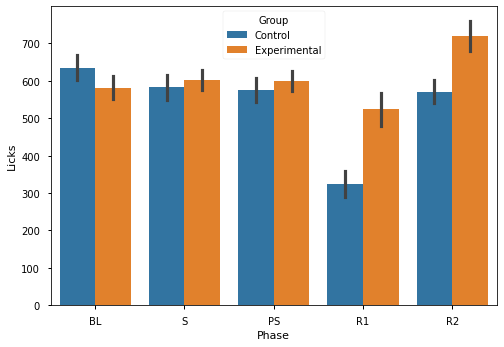

In [39]:
sns.barplot('Phase','Licks',data=df2,hue='Group',ci=68)

In [66]:
df2

,Mouse_ID,Group,Day,Licks,Phase,Day_of_Phase
0,1,Control,BL1,665,BL,1
1,2,Control,BL1,859,BL,1
2,3,Control,BL1,589,BL,1
3,4,Control,BL1,939,BL,1
4,5,Experimental,BL1,710,BL,1
...,...,...,...,...,...,...
435,18,Experimental,R2_4,880,R2,4
436,19,Experimental,R2_4,1047,R2,4
437,20,Experimental,R2_4,293,R2,4
438,21,Experimental,R2_4,900,R2,4


In [57]:
formula = "Licks~C(Group)*C(Phase)"#'S ~ C(E) + C(M) + X'
lm = ols(formula, df2).fit()

In [58]:
table = sm.stats.anova_lm(lm, typ=2)
table['sig'] = table['PR(>F)'] <.05
display(table)

,sum_sq,df,F,PR(>F),sig
C(Group),4.951e+05,1.0,9.240,2.512e-03,True
C(Phase),2.254e+06,4.0,10.516,3.892e-08,True
C(Group):C(Phase),9.140e+05,4.0,4.264,2.147e-03,True
Residual,2.304e+07,430.0,NaN,NaN,False


In [77]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## compare phase
res = pairwise_tukeyhsd(df2['Licks'],df2['Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,-14.1705,0.9,-112.0762,83.7353,False
BL,R1,-159.6705,0.001,-257.5762,-61.7647,True
BL,R2,55.4432,0.5256,-42.4626,153.3489,False
BL,S,-8.75,0.9,-106.6557,89.1557,False
PS,R1,-145.5,0.001,-243.4057,-47.5943,True
PS,R2,69.6136,0.2939,-28.2921,167.5194,False
PS,S,5.4205,0.9,-92.4853,103.3262,False
R1,R2,215.1136,0.001,117.2079,313.0194,True
R1,S,150.9205,0.001,53.0147,248.8262,True
R2,S,-64.1932,0.3782,-162.0989,33.7126,False


In [80]:
df2['Group_Phase'] = df2['Group']+'-'+df2['Phase']
df2

,Mouse_ID,Group,Day,Licks,Phase,Day_of_Phase,Group_Phase
0,1,Control,BL1,665,BL,1,Control-BL
1,2,Control,BL1,859,BL,1,Control-BL
2,3,Control,BL1,589,BL,1,Control-BL
3,4,Control,BL1,939,BL,1,Control-BL
4,5,Experimental,BL1,710,BL,1,Experimental-BL
...,...,...,...,...,...,...,...
435,18,Experimental,R2_4,880,R2,4,Experimental-R2
436,19,Experimental,R2_4,1047,R2,4,Experimental-R2
437,20,Experimental,R2_4,293,R2,4,Experimental-R2
438,21,Experimental,R2_4,900,R2,4,Experimental-R2


In [82]:
## compare phase
res = pairwise_tukeyhsd(df2['Licks'],df2['Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,-14.1705,0.9,-112.0762,83.7353,False
BL,R1,-159.6705,0.001,-257.5762,-61.7647,True
BL,R2,55.4432,0.5256,-42.4626,153.3489,False
BL,S,-8.75,0.9,-106.6557,89.1557,False
PS,R1,-145.5,0.001,-243.4057,-47.5943,True
PS,R2,69.6136,0.2939,-28.2921,167.5194,False
PS,S,5.4205,0.9,-92.4853,103.3262,False
R1,R2,215.1136,0.001,117.2079,313.0194,True
R1,S,150.9205,0.001,53.0147,248.8262,True
R2,S,-64.1932,0.3782,-162.0989,33.7126,False


In [83]:
## compare phase
res = pairwise_tukeyhsd(df2['Licks'],df2['Group_Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Control-BL,Control-PS,-59.8889,0.9,-233.4175,113.6397,False
Control-BL,Control-R1,-309.1667,0.001,-482.6953,-135.638,True
Control-BL,Control-R2,-64.5,0.9,-238.0286,109.0286,False
Control-BL,Control-S,-52.0556,0.9,-225.5842,121.4731,False
Control-BL,Experimental-BL,-53.0983,0.9,-212.7214,106.5248,False
Control-BL,Experimental-PS,-35.6175,0.9,-195.2406,124.0056,False
Control-BL,Experimental-R1,-109.2714,0.4762,-268.8945,50.3518,False
Control-BL,Experimental-R2,85.3825,0.7679,-74.2406,245.0056,False
Control-BL,Experimental-S,-31.8675,0.9,-191.4906,127.7556,False
Control-PS,Control-R1,-249.2778,0.001,-422.8064,-75.7491,True


In [87]:
from statsmodels.stats.anova import AnovaRM
aovrm = AnovaRM(df2, 'Licks', 'Mouse_ID', within=['Phase'],aggregate_func=np.nanmean)#,between=['Group'])
res = aovrm.fit()

print(res)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
Phase  8.1372 4.0000 84.0000 0.0000



In [90]:
from statsmodels.stats.anova import AnovaRM

# df2.groupby('Group').get_group('Experimental')
aovrm = AnovaRM(df2.groupby('Group').get_group('Experimental'),
                'Licks', 'Mouse_ID', within=['Phase'],aggregate_func=np.nanmean)#,between=['Group'])
res = aovrm.fit()

print(res)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
Phase  2.9985 4.0000 48.0000 0.0274



In [63]:
# res = pairwise_tukeyhsd(exp_df['Licks'],exp_df['Phase'])
# res.summary()

In [ ]:
# df2.to_csv('../Neuroscience/mouse_drinking_data_melted.csv',index=False)

In [ ]:
# pd.read_csv('../Neuroscience/mouse_drinking_data_melted.csv')

## CONCLUSION
- Running the correct test according to the assumptions of normality and equal variance will ensure you can get the correct test result.

- Notice how the last phase (R) did NOT come back as significant when we ran the t-test, but DID come back significant when we performed the Mann Whitney U instead. 



(https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

## Effect Size Visual
- https://rpsychologist.com/d3/NHST/


## Ephys Figure
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_fig1.png">

## Statistical Analysis Pipeline

1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```<br>
    
    
2. **Test for Homogeneity of Variance**

    - Levene's Test<br>
    ```scipy.stats.levene```


3. **Choose appropriate test based upon 1. and 2.** <br> 
    - T Test (1-sample)
        - `stats.ttest_1samp()`
    - T Test (2-sample)
        - `stats.ttest_ind()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
    - Welch's T-Test (2-sample)
        - `stats.ttest_ind(equal_var=False)`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
        
    - Mann Whitney U
        - `stats.mannwhitneyu()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
    - ANOVA 
        - `stats.f_oneway()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
    - Tukey's
     - `statsmodels.stats.multicomp.pairwise_tukeyhsd`
     -[docs](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
    

4. **Calculate effect size for significant results.**
    - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
    - Interpretation:
        - Small effect = 0.2 ( cannot be seen by naked eye)
        - Medium effect  = 0.5
        - Large Effect = 0.8 (can be seen by naked eye)
        
5. **If significant, follow up with post-hoc tests (if have more than 2 groups)**
    - [Tukey's](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
